In [1]:
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Load MNSIT Data

In [4]:
training_data = torchvision.datasets.MNIST(
    root = "data",
    train = True,
    download = True,
    transform = transforms.ToTensor()
)

test_data = torchvision.datasets.MNIST(
    root = "data",
    train = False,
    download = True,
    transform = transforms.ToTensor()
)

# Implementing DataLoaders

train_dataloader = DataLoader(training_data, batch_size = 64, shuffle = True)
test_dataloader = DataLoader(test_data, batch_size = 64, shuffle = True)

In [6]:
train_features, train_label = next(iter(train_dataloader))

print("train_features shape: ", train_features.size())
print("train_label shape: ", train_label.size())

train_features shape:  torch.Size([64, 1, 28, 28])
train_label shape:  torch.Size([64])


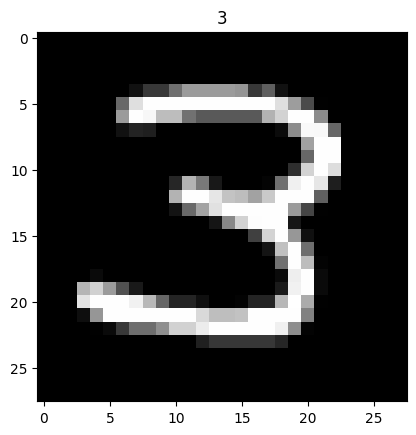

In [8]:
img = train_features[0].squeeze()
label = train_label[0]

plt.title(f"{label}")
plt.imshow(img, cmap = 'gray')
plt.show()

# Building Network

In [11]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size = 5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size = 5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training = self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [13]:
network = Net()
optimizer = optim.SGD(network.parameters(), lr=0.01,
                      momentum=0.5)

In [15]:
n_epochs = 3

train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_dataloader.dataset) for i in range(n_epochs + 1)]

In [45]:
def train(epoch):
  network.train()
  for batch_idx, (data, target) in enumerate(train_dataloader):
    optimizer.zero_grad()
    output = network(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 10 == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_dataloader.dataset),
        100. * batch_idx / len(train_dataloader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_dataloader.dataset)))
      torch.save(network.state_dict(), 'model.pth')
      torch.save(optimizer.state_dict(), 'optimizer.pth')

In [47]:
def test():
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_dataloader:
      output = network(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_dataloader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_dataloader.dataset),
    100. * correct / len(test_dataloader.dataset)))

In [49]:
test()
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()

/var/folders/_f/6j9gn6dj19xftmqy10_2zr7m0000gn/T/ipykernel_89082/420148554.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)



Test set: Avg. loss: 2.3072, Accuracy: 911/10000 (9%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.313809
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.323344
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.297519
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.286045
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.274732
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.294171
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.299711
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.329440
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.289531
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.287443
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.302925
Train Epoch: 1 [7040/60000 (12%)]	Loss: 2.297152
Train Epoch: 1 [7680/60000 (13%)]	Loss: 2.288104
Train Epoch: 1 [8320/60000 (14%)]	Loss: 2.291480
Train Epoch: 1 [8960/60000 (15%)]	Loss: 2.272311
Train Epoch: 1 [9600/60000 (16%)]	Loss: 2.263172
Train Epoch: 1 [10240/60000 (17%)]	Loss: 2.274955
Train Epoch: 1 [10880/60000 (18%)]	Loss: 2.268209
Train Epoch: 1 [11520/60000 (19%)]	Loss: 2.266747
Train Epoch: 1 [12160/6